# SVM with PCA

In [11]:
import pandas as pd
import matplotlib.pyplot as mat
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('Spam.csv')
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
data.describe()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [5]:
data.groupby('spam').mean()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam,,,,,,,,,,,,,,,,,,,,,
0,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,...,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
1,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,...,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415


In [6]:
data.groupby('spam').max()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam,,,,,,,,,,,,,,,,,,,,,
0,4.34,14.28,5.1,0.87,10.00,5.88,3.07,5.88,5.26,18.18,...,10.00,4.385,5.277,4.081,32.478,2.038,7.407,251.0,1488,5902
1,4.54,4.76,3.7,42.81,7.69,2.54,7.27,11.11,3.33,7.55,...,0.77,1.117,9.752,1.171,7.843,6.003,19.829,1102.5,9989,15841


In [7]:
data.groupby('spam').mean()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam,,,,,,,,,,,,,,,,,,,,,
0,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,...,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
1,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,...,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415


In [8]:
corr = data.corr()


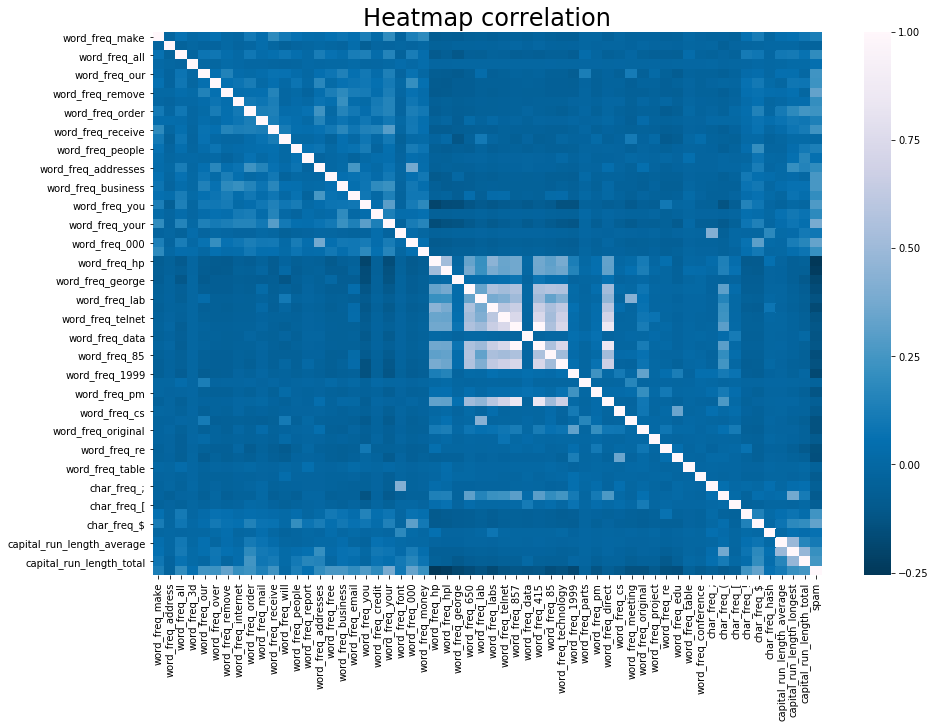

In [9]:
mat.figure(figsize=(15,10))
sns.heatmap(corr,cmap='PuBu_r')
sns.set(font_scale=2, style='white')

mat.title('Heatmap correlation')
mat.show()

#### Feature Scaling

In [19]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop('spam',axis=1))
scaled_data = pd.DataFrame(scaled_data,columns=data.drop('spam',axis=1).columns)

In [21]:
data = scaled_data.join(data['spam'])
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1


#### Test-Train Data split

In [72]:
shuffle_index = np.random.permutation(len(data))
shuffle_index

array([3982, 1207, 1439, ..., 1554, 2899, 3170])

In [81]:
test_size = int( len(shuffle_index) * 0.2)
test_size

920

In [82]:
test_data = shuffle_index[:test_size]
train_data = shuffle_index[test_size:]
train = data.iloc[train_data]
test = data.iloc[test_data]

In [83]:
train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
2206,0.0,0.000000,0.252941,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.070957,...,0.0,0.022559,0.00000,0.000000,0.0,0.000000,0.000318,0.000300,0.001641,0
2186,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.010562,0.00000,0.000000,0.0,0.000000,0.001894,0.005406,0.008902,0
1074,0.0,0.038515,0.107843,0.0,0.11,0.093537,0.302613,0.0,0.000000,0.030253,...,0.0,0.016920,0.00000,0.015272,0.0,0.004135,0.014328,0.014718,0.024306,1
3350,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.68047,0.000000,0.0,0.000000,0.000908,0.000300,0.000316,0
2361,0.0,0.000000,0.476471,0.0,0.00,0.000000,0.000000,0.0,0.051331,0.000000,...,0.0,0.035275,0.00000,0.000000,0.0,0.000000,0.001197,0.001101,0.010480,0


In [84]:
test.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
3982,0.000000,0.000000,0.247059,0.0,0.000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.015279,0.000000,0.004588,0.000000,0.000000,0.000384,0.000901,0.002273,0
1207,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.047375,0.000000,0.014225,0.000000,0.000000,0.001929,0.000501,0.001515,1
1439,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.037804,0.00000,0.023102,...,0.000000,0.013228,0.000000,0.003972,0.032317,0.000000,0.000780,0.001902,0.007449,1
275,0.000000,0.011905,0.000000,0.0,0.000,0.000000,0.023384,0.046805,0.00000,0.009351,...,0.006385,0.014664,0.006861,0.002617,0.009495,0.011549,0.002328,0.003805,0.026263,1
831,0.039648,0.000000,0.017647,0.0,0.036,0.015306,0.000000,0.032403,0.01711,0.000000,...,0.000000,0.006153,0.007351,0.000924,0.002499,0.000000,0.002898,0.004706,0.035669,1


#### SVM 

In [94]:
svc = svm.SVC(kernel = 'rbf',gamma=1,C=5)

In [95]:
svc.fit(train.drop('spam',axis=1),train['spam'])

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
predictions = svc.predict(test.drop('spam',axis=1))


In [97]:
accuracy_score(test['spam'],predictions)

0.9445652173913044